# Introduction:

To illustrate document clustering using state-of-the-art embeddings such as LLM embeddings, we can leverage sentence-transformers, open-source large language models (LLMs), or Hugging Face's transformer embeddings. The clustering will involve:

* Embedding Generation: Using pretrained embeddings for the documents.
* Clustering: Applying clustering algorithms (e.g., K-Means, Agglomerative Clustering).
* Evaluation: Assessing cluster quality using metrics such as Silhouette Score.
* Visualization: Using techniques like t-SNE or PCA for 2D visualization.

# Step 1: Install Libraries

In [1]:
!pip install sentence-transformers
!pip install sklearn
!pip install matplotlib
!pip install pandas


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# Step 2: Load Dataset

In [2]:
from sklearn.datasets import fetch_20newsgroups

# Load a subset of the dataset (e.g., 2 categories for simplicity)
categories = ['sci.space', 'comp.graphics']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Extract documents
documents = newsgroups.data[:100]  # Limit to 100 documents for efficiency
print(f"Loaded {len(documents)} documents.")


Loaded 100 documents.


# Step 3: Generate Embeddings using LLM

In [3]:
from sentence_transformers import SentenceTransformer

# Load a pretrained embedding model (e.g., all-MiniLM-L6-v2 for efficiency)
model = SentenceTransformer('all-MiniLM-L6-v2')  # State-of-the-art LLM embeddings

# Generate embeddings for the documents
embeddings = model.encode(documents)
print(f"Generated Embeddings Shape: {embeddings.shape}")


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Generated Embeddings Shape: (100, 384)


# Step 4: Perform K-Means Clustering

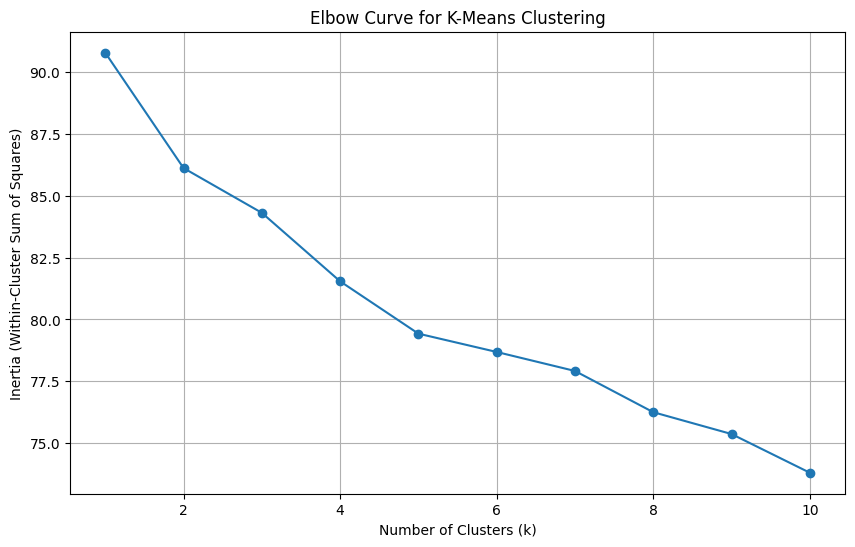

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of clusters to evaluate
cluster_range = range(1, 11)
inertia_values = []

# Compute K-Means for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title("Elbow Curve for K-Means Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid()
plt.show()


In [5]:
# Perform K-Means with optimal number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(embeddings)

# Print cluster assignments
print(f"Cluster Assignments (K-Means): {kmeans_labels}")


Cluster Assignments (K-Means): [0 1 1 0 1 2 0 1 1 1 2 1 1 0 1 2 2 1 2 2 1 1 2 1 1 2 1 1 2 2 2 2 2 2 1 1 1
 0 1 1 0 0 2 1 1 0 1 2 0 0 2 2 2 0 1 1 2 1 1 1 2 1 2 2 0 2 1 1 1 1 1 0 1 2
 1 0 1 2 2 1 1 2 0 2 1 0 0 0 2 2 1 1 2 1 1 2 2 0 2 2]


# Step 5: Perform Agglomerative Clustering

In [6]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
agg_labels = agg_clustering.fit_predict(embeddings)

# Print cluster assignments
print(f"Cluster Assignments (Agglomerative): {agg_labels}")


Cluster Assignments (Agglomerative): [2 2 2 0 0 1 0 2 2 2 1 2 0 2 2 1 1 1 1 1 2 2 1 2 1 1 2 0 1 1 1 1 0 0 0 2 0
 0 2 0 2 0 1 2 2 0 2 1 1 0 1 1 1 1 2 0 0 2 0 0 1 0 1 1 0 1 0 0 2 2 0 2 2 1
 2 0 0 1 1 0 0 0 0 1 1 0 2 0 0 0 0 0 0 2 0 1 1 0 1 0]


# Step 6: Visualize Clusters


# 6.1 t-SNE Visualization
Use t-SNE to reduce embeddings to 2D for visualization.

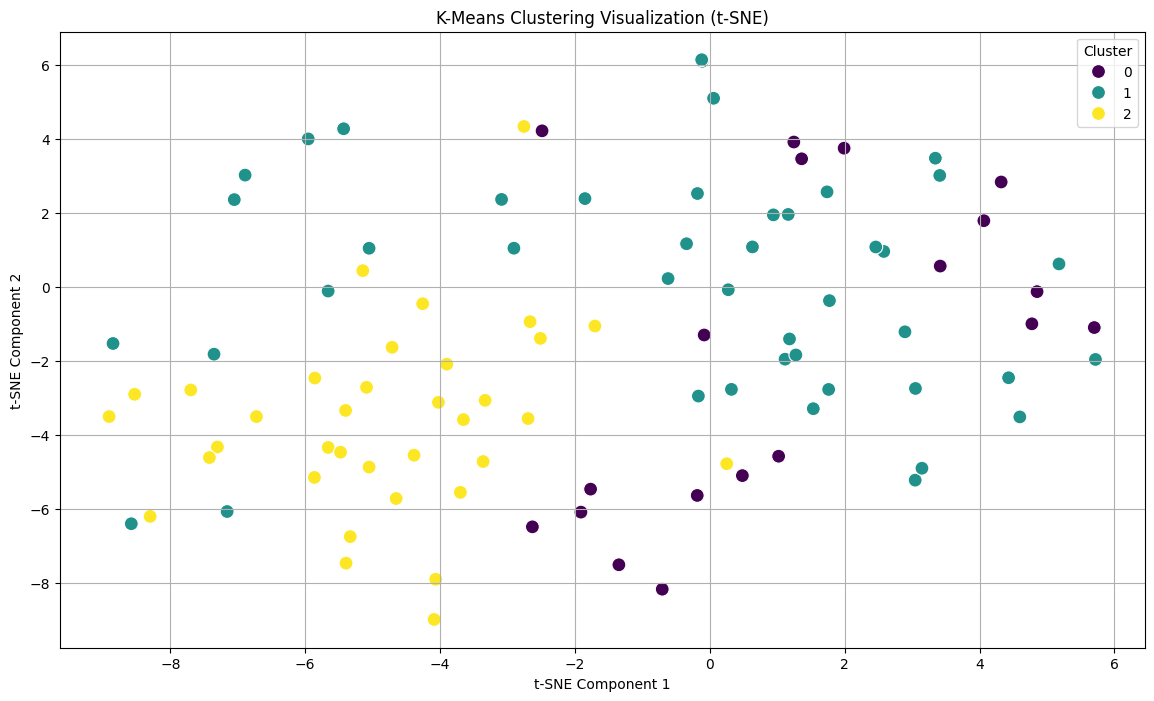

In [7]:
from sklearn.manifold import TSNE
import seaborn as sns

# Reduce dimensions for visualization
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

# Plot clusters
plt.figure(figsize=(14, 8))
sns.scatterplot(
    x=reduced_embeddings[:, 0],
    y=reduced_embeddings[:, 1],
    hue=kmeans_labels,
    palette="viridis",
    s=100
)
plt.title("K-Means Clustering Visualization (t-SNE)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster", loc="best")
plt.grid()
plt.show()


# 6.2 Heatmap for Cluster Similarities
Visualize cluster centroid distances for K-Means using a heatmap.

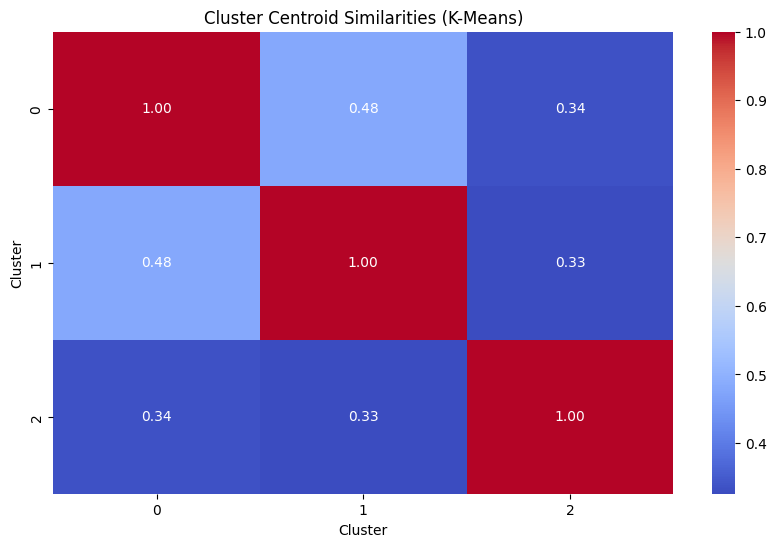

In [8]:
import numpy as np
import seaborn as sns

# Compute cosine similarity between cluster centroids
from sklearn.metrics.pairwise import cosine_similarity
centroids = kmeans.cluster_centers_
similarities = cosine_similarity(centroids)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(similarities, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=range(optimal_k), yticklabels=range(optimal_k))
plt.title("Cluster Centroid Similarities (K-Means)")
plt.xlabel("Cluster")
plt.ylabel("Cluster")
plt.show()


# Step 7: Evaluate Clustering Quality

In [9]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Evaluate K-Means Clustering
kmeans_silhouette = silhouette_score(embeddings, kmeans_labels)
kmeans_db = davies_bouldin_score(embeddings, kmeans_labels)
kmeans_ch = calinski_harabasz_score(embeddings, kmeans_labels)

# Evaluate Agglomerative Clustering
agg_silhouette = silhouette_score(embeddings, agg_labels)
agg_db = davies_bouldin_score(embeddings, agg_labels)
agg_ch = calinski_harabasz_score(embeddings, agg_labels)

# Print Evaluation Metrics
print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"K-Means Davies-Bouldin Index: {kmeans_db}")
print(f"K-Means Calinski-Harabasz Index: {kmeans_ch}")

print(f"Agglomerative Silhouette Score: {agg_silhouette}")
print(f"Agglomerative Davies-Bouldin Index: {agg_db}")
print(f"Agglomerative Calinski-Harabasz Index: {agg_ch}")


K-Means Silhouette Score: 0.030617868527770042
K-Means Davies-Bouldin Index: 4.619423309640432
K-Means Calinski-Harabasz Index: 3.7272121405324707
Agglomerative Silhouette Score: 0.03620122745633125
Agglomerative Davies-Bouldin Index: 4.435712761884694
Agglomerative Calinski-Harabasz Index: 4.23473720399373


**Summary of Outputs**
* Elbow Curve: Determines the optimal number of clusters.
* t-SNE Visualization: Visualizes document embeddings and cluster assignments.
* Heatmap of Centroid Similarities: Shows relationships between clusters.
* Cluster Quality Metrics:
    * Silhouette Score: Measures how well-separated clusters are.
    * Davies-Bouldin Index: Lower is better (less similarity between clusters).
    * Calinski-Harabasz Index: Higher is better (greater dispersion between clusters).

# Visualization with Document Names

Step 1: Prepare Document Labels
Generate short labels from the documents (e.g., first 10 words) for better readability in the plot.

In [10]:
# Generate labels: First 10 words of each document
document_labels = [' '.join(doc.split()[:10]) + '...' for doc in documents]

# Check labels
for i, label in enumerate(document_labels[:5]):
    print(f"Document {i+1}: {label}")


Document 1: Actually, Hiten wasn't originally intended to go into lunar orbit...
Document 2: Archive-name: space/launchers Last-modified: $Date: 93/04/01 14:39:11 $ ORBITAL AND PLANETARY...
Document 3: Neil Gehrels is Prof. Tom Gehrels son. Tom Gehrels was...
Document 4: I have the "osculating elements at perigee" of an orbit,...
Document 5: Speaking of SIGGRAPH, I just went through the ordeal of...


Step 2: Visualize Clusters with Labels
We’ll now create a scatter plot with labels as annotations. This requires using matplotlib to annotate the points.

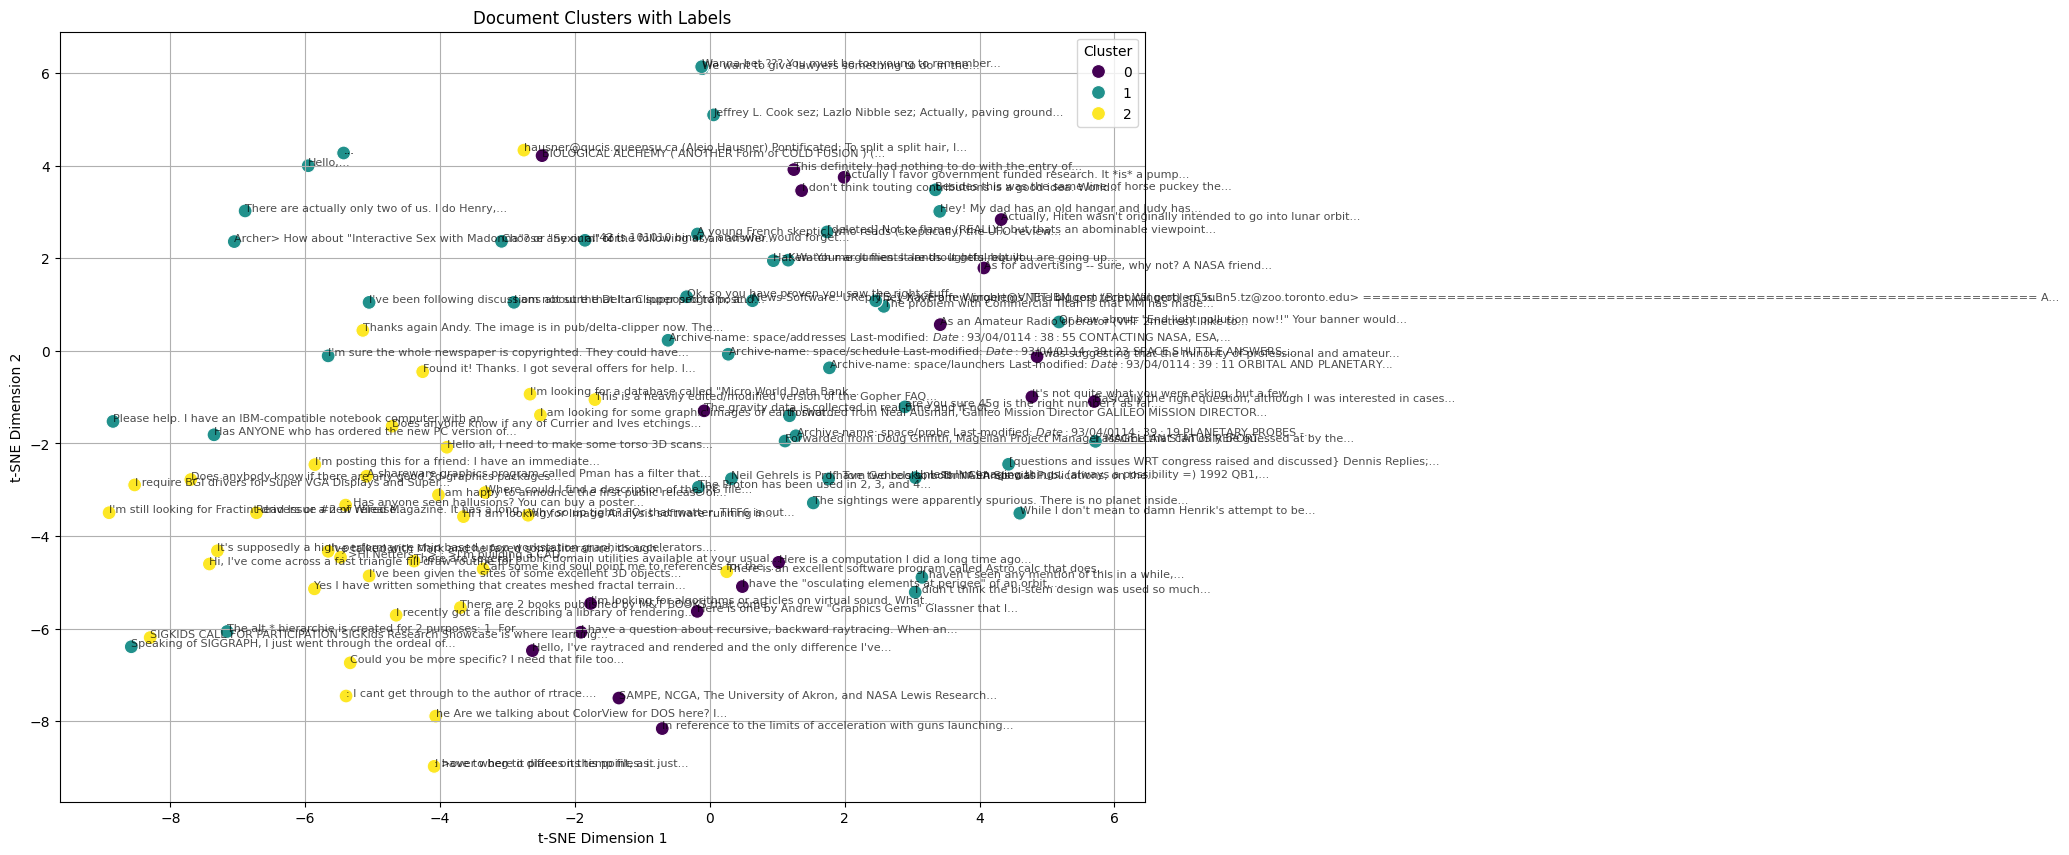

In [11]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

# Reduce dimensions for visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

# Plot t-SNE results
plt.figure(figsize=(14, 10))
sns.scatterplot(
    x=reduced_embeddings[:, 0],
    y=reduced_embeddings[:, 1],
    hue=kmeans_labels,  # Color by K-Means cluster
    palette="viridis",
    s=100
)

# Annotate each point with the document label
for i, label in enumerate(document_labels):
    plt.annotate(label, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=8, alpha=0.7)

# Customize plot
plt.title("Document Clusters with Labels")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster", loc="best")
plt.grid()
plt.show()


The plot is overcrowded, so:
* Annotate only a subset of documents.
* Use interactive plotting libraries like plotly for zoom and hover features.

# Annotate Only a Subset:

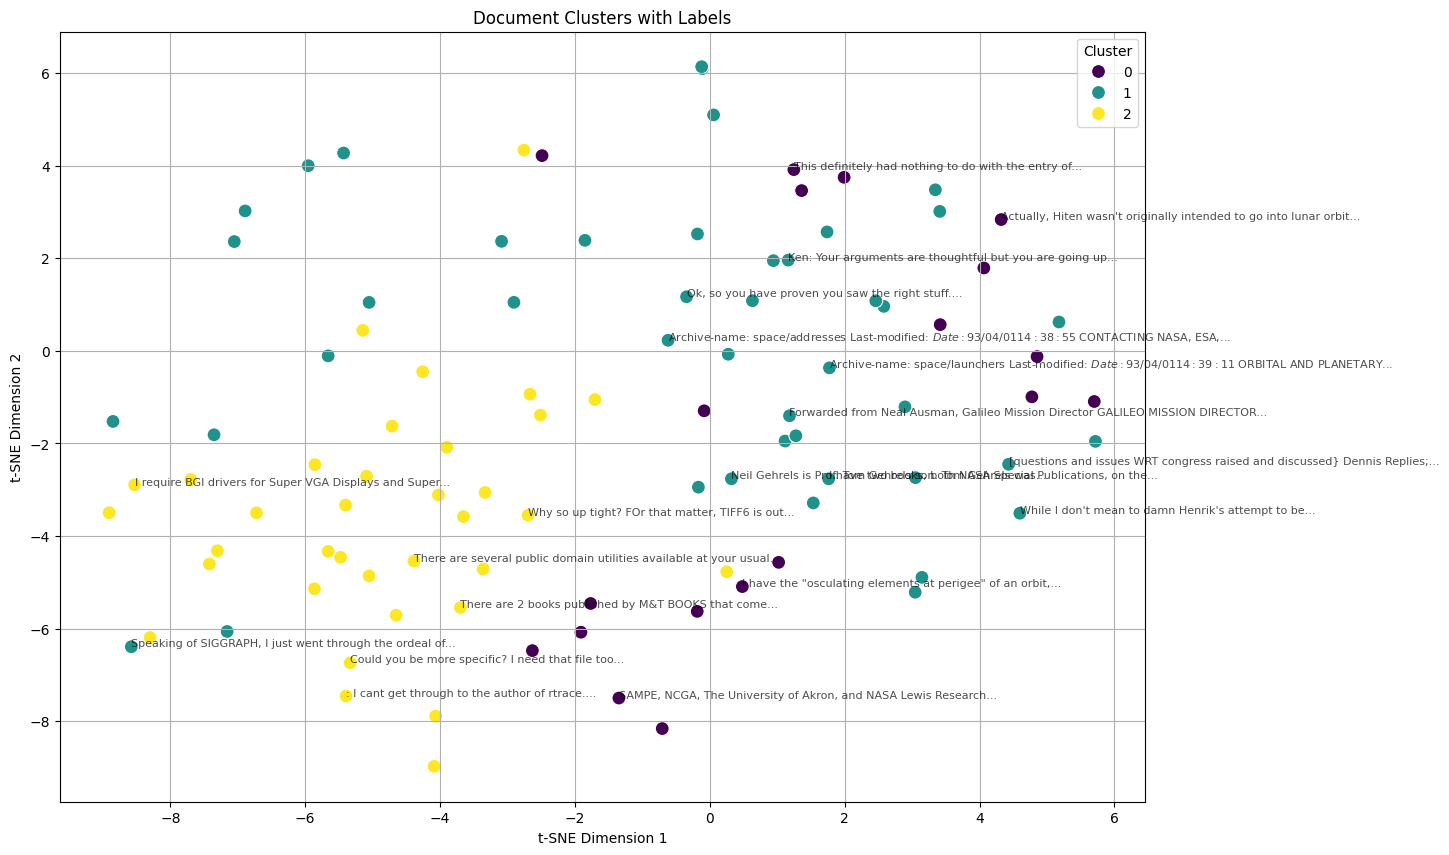

In [13]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

# Reduce dimensions for visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

# Plot t-SNE results
plt.figure(figsize=(14, 10))
sns.scatterplot(
    x=reduced_embeddings[:, 0],
    y=reduced_embeddings[:, 1],
    hue=kmeans_labels,  # Color by K-Means cluster
    palette="viridis",
    s=100
)

# Annotate only the first 20 documents for clarity
for i, label in enumerate(document_labels[:20]):
    plt.annotate(label, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=8, alpha=0.7)

# Customize plot
plt.title("Document Clusters with Labels")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster", loc="best")
plt.grid()
plt.show()


**Advantages of This Approach** :
* Readable Clusters: You can immediately see the document text in each cluster.
* Interactive Exploration: With plotly, you can zoom in on dense clusters and see document details on hover.
* Customizable Annotations: You can tailor labels based on document metadata, such as titles, categories, or snippets.



# Use Hover with plotly:

In [14]:
!pip install plotly


In [15]:
import plotly.express as px
import pandas as pd

# Prepare data for interactive plotting
tsne_df = pd.DataFrame({
    'x': reduced_embeddings[:, 0],
    'y': reduced_embeddings[:, 1],
    'label': document_labels,
    'cluster': kmeans_labels
})

# Interactive plot
fig = px.scatter(
    tsne_df, x='x', y='y', color='cluster', text='label',
    title="Document Clusters with Labels",
    labels={'x': "t-SNE Dimension 1", 'y': "t-SNE Dimension 2"}
)
fig.update_traces(marker=dict(size=10), textposition='top center')
fig.show()
